In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import networkx as nx
from mlxtend.frequent_patterns import apriori, association_rules


In [2]:
data = pd.read_csv('Market_Basket.csv', header = None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


In [3]:
data.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7500,eggs,frozen smoothie,yogurt cake,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
data.describe()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [6]:
transactions = []
for i in range(data.shape[0]):
    transactions.append([str(data.values[i, j]) for j in range(data.shape[1]) if str(data.values[i, j]) != 'nan'])

In [7]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

Apriori Algorithm to find frequent itemsets

In [8]:
frequent_itemsets = apriori(df_encoded, min_support=0.05, use_colnames=True)

Generating association rules

In [9]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)


Additional metrics

In [16]:
rules['zhang'] = (rules['confidence'] - rules['antecedent support']) / np.maximum(rules['confidence'], rules['antecedent support'])
rules['leverage'] = rules['support'] - (rules['antecedent support'] * rules['consequent support'])
rules['conviction'] = (1 - rules['consequent support']) / (1 - rules['confidence'])

# Plots and diagrams


 ## Lift vs Zhang's metric

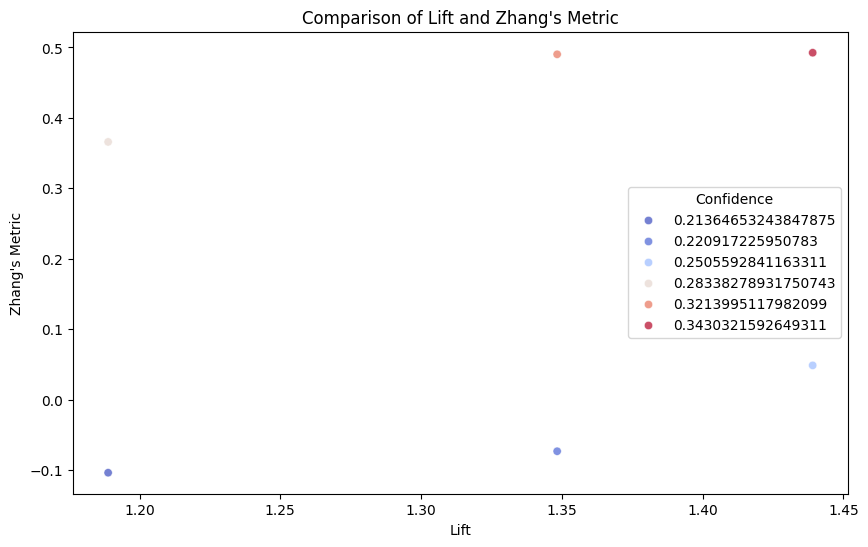

In [22]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x=rules['lift'], y=rules['zhang'], hue=rules['confidence'], palette='coolwarm', alpha=0.7)
plt.xlabel('Lift')
plt.ylabel("Zhang's Metric")
plt.title("Comparison of Lift and Zhang's Metric")
plt.legend(title="Confidence")
plt.show()

## Top 10 frequent items

C:\Users\User\AppData\Local\Temp\ipykernel_32648\2287331978.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequent_itemsets['support'].head(10), y=frequent_itemsets['itemsets'].head(10).astype(str), palette='viridis')


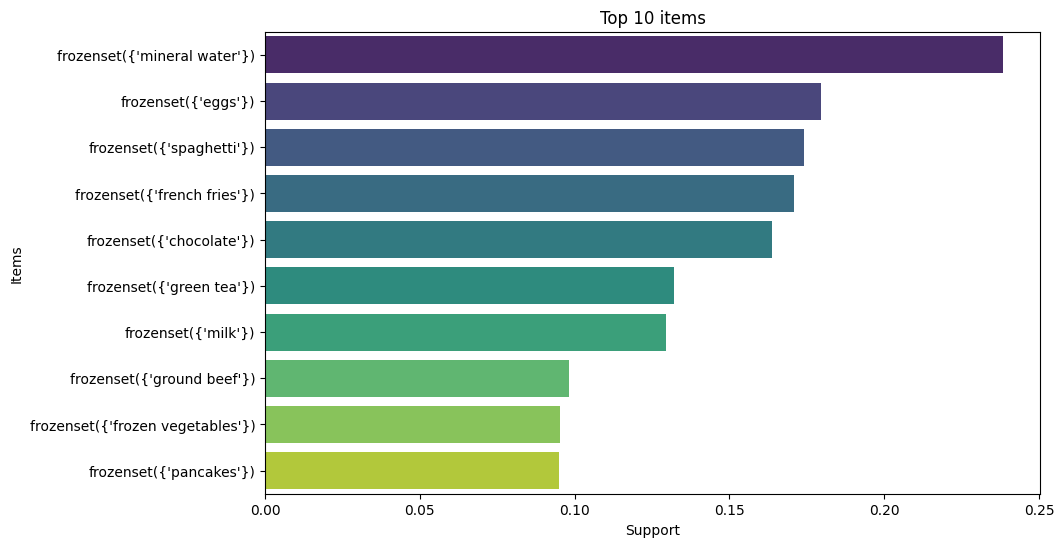

In [28]:
plt.figure(figsize=(10,6))
frequent_itemsets.sort_values(by='support', ascending=False, inplace=True)
sns.barplot(x=frequent_itemsets['support'].head(10), y=frequent_itemsets['itemsets'].head(10).astype(str), palette='viridis')
plt.xlabel('Support')
plt.ylabel('Items')
plt.title('Top 10 items')
plt.show()

## Lift of top association rules


C:\Users\User\AppData\Local\Temp\ipykernel_32648\1851141445.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rules['lift'].head(10), y=rules['antecedents'].head(10).astype(str) + " -> " + rules['consequents'].head(10).astype(str), palette='coolwarm')


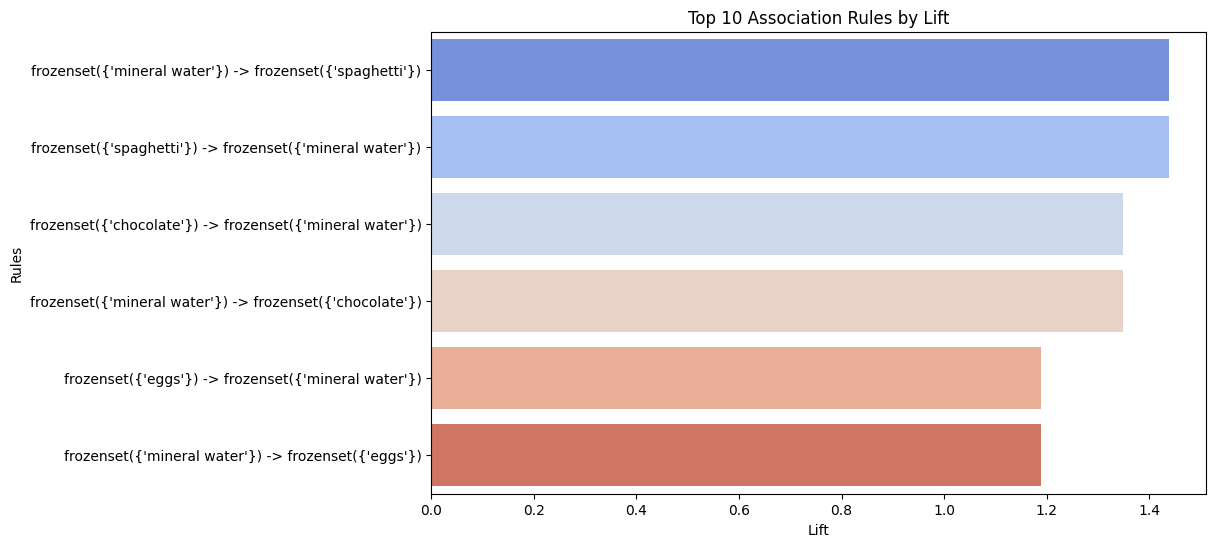

In [12]:
plt.figure(figsize=(10,6))
rules.sort_values(by='lift', ascending=False, inplace=True)
sns.barplot(x=rules['lift'].head(10), y=rules['antecedents'].head(10).astype(str) + " -> " + rules['consequents'].head(10).astype(str), palette='coolwarm')
plt.xlabel('Lift')
plt.ylabel('Rules')
plt.title('Top 10 Association Rules by Lift')
plt.show()


## Confidence, support and lift distributions

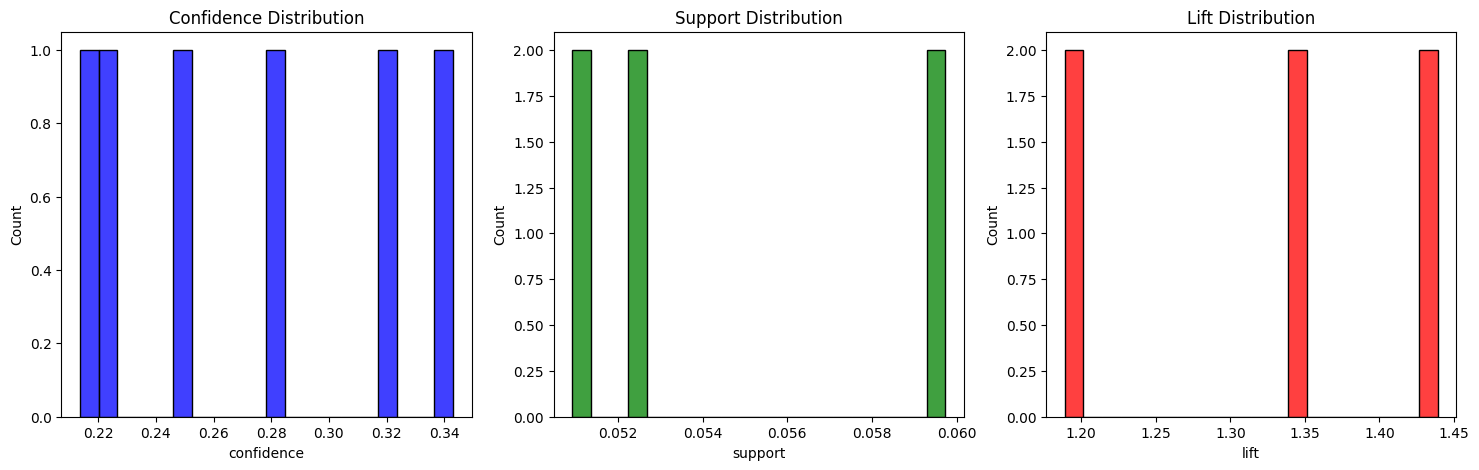

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.histplot(rules['confidence'], bins=20, ax=axes[0], color='blue')
axes[0].set_title('Confidence Distribution')
sns.histplot(rules['support'], bins=20, ax=axes[1], color='green')
axes[1].set_title('Support Distribution')
sns.histplot(rules['lift'], bins=20, ax=axes[2], color='red')
axes[2].set_title('Lift Distribution')
plt.show()


## Heatmap: Support vs Confidence 

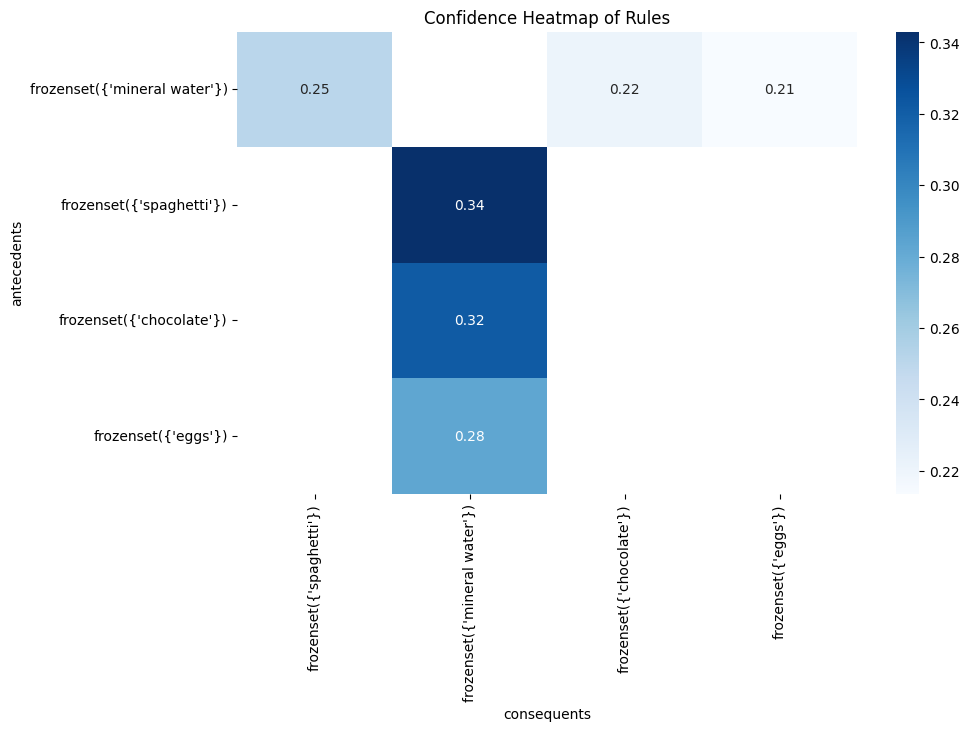

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(rules.pivot(index='antecedents', columns='consequents', values='confidence'), annot=True, cmap='Blues', fmt='.2f')
plt.title('Confidence Heatmap of Rules')
plt.show()

## Correlation Matrix

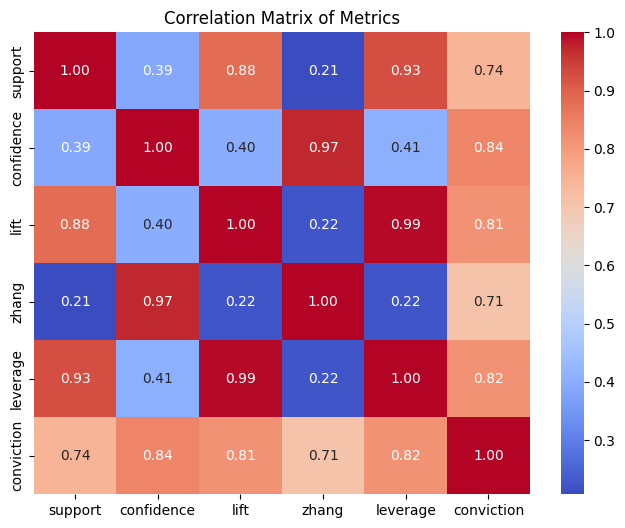

In [18]:
plt.figure(figsize=(8,6))
corr_matrix = rules[['support', 'confidence', 'lift', 'zhang', 'leverage', 'conviction']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Metrics')
plt.show()

## Hierarchical Clustering on Rules

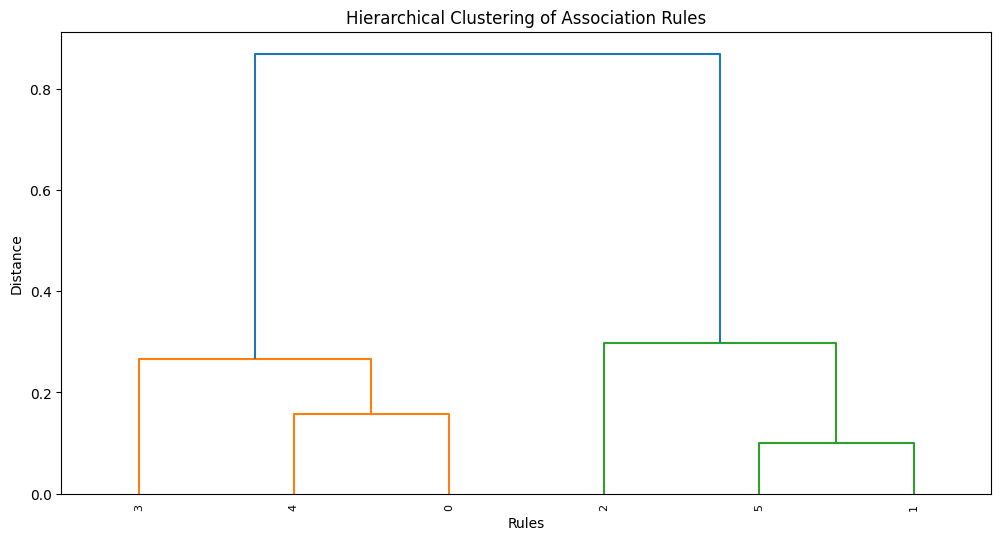

In [21]:
plt.figure(figsize=(12,6))
dist_matrix = sch.linkage(rules[['support', 'confidence', 'lift', 'zhang', 'leverage', 'conviction']], method='ward')
sch.dendrogram(dist_matrix, labels=rules.index, leaf_rotation=90, leaf_font_size=8)
plt.title('Hierarchical Clustering of Association Rules')
plt.xlabel('Rules')
plt.ylabel('Distance')
plt.show()

In [15]:
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606,0.048655
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437,0.492438
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965,0.490214
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197,-0.073210
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648,0.365842


In [23]:
rules.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,zhang
5,(spaghetti),(mineral water),0.174110,0.238368,0.059725,0.343032,1.439085,0.018223,1.159314,0.369437,0.492438
4,(mineral water),(spaghetti),0.238368,0.174110,0.059725,0.250559,1.439085,0.018223,1.102008,0.400606,0.048655
1,(chocolate),(mineral water),0.163845,0.238368,0.052660,0.321400,1.348332,0.013604,1.122357,0.308965,0.490214
0,(mineral water),(chocolate),0.238368,0.163845,0.052660,0.220917,1.348332,0.013604,1.073256,0.339197,-0.073210
2,(eggs),(mineral water),0.179709,0.238368,0.050927,0.283383,1.188845,0.008090,1.062815,0.193648,0.365842
3,(mineral water),(eggs),0.238368,0.179709,0.050927,0.213647,1.188845,0.008090,1.043158,0.208562,-0.103712
